# Sample

This sample shows how the lightroot project works. Note important settings are confined to a settings file so that we try
to make the slow batch jobs parameterless. The method names should be self-explantory - we sharpen images, pluck centroids and show a sample of the overlay. This process is carried out in batch to create a dataframe of blobs which is saved to txt files in the cached data folder. Having extracted centroids for all frames, the tracker builds the identities and writes the result to the cached data folder

In [1]:
%matplotlib inline
import lightroot

10/04/2018 12:43:23 INFO:loaded lightroot


# 1 Manually set file templates for processing

In [2]:
pth  ="C:/Users/mrsir/Box Sync/CYCB-GFP/uncut/Raw Data/083117/149/"
lightroot.SETTINGS["stack_files"] = pth+"Run0149_tp{:0>3}.tif"
lightroot.SETTINGS["maxint_files"] = pth+"Run0149_tp{}_MIP.tif"

# 2 Loading frames

In [3]:
# sample_time_frame =71
# stack = lightroot.io.get_stack(sample_time_frame)
# lightroot.io.plotimg(stack)

# 3 Full frame detection routine

In [4]:
# blob_centroids,stack = lightroot.blobs.detect(stack,  display_detections=True) #sharpen_iter=2, isolate_iter=2,
# lightroot.io.overlay_blobs(stack,blob_centroids)

# 4 Running batch process

In [5]:
#lightroot.process("C:/Users/mrsir/Box Sync/uncut/images/083117/149/", log_to_file=False)

# 5 Low-level steps

## isolating roots via lowband

### 2d

10/04/2018 12:43:28 INFO(71):Stack loaded from C:/Users/mrsir/Box Sync/CYCB-GFP/uncut/Raw Data/083117/149/Run0149_tp071.tif
10/04/2018 12:43:28 INFO(71):using low band range for 2d data from 95,99, 50 data percentile [0.228, 0.307, 0.17]
10/04/2018 12:43:28 INFO(71):projecting 2d mask to 3d mask...
10/04/2018 12:43:29 INFO(71):using low band range for 3d data from 95,99, 50 data percentile [0.033, 0.051, 0.02]
10/04/2018 12:43:29 INFO(71):using final filter from percentile low band range 0.051
10/04/2018 12:43:29 INFO(71):checking shine @ 152830.00
10/04/2018 12:43:29 WARN(71):bright frame detected. removing bottom
10/04/2018 12:43:29 INFO(71):extracted root region with volume 14716800 with non-zero 1.04%


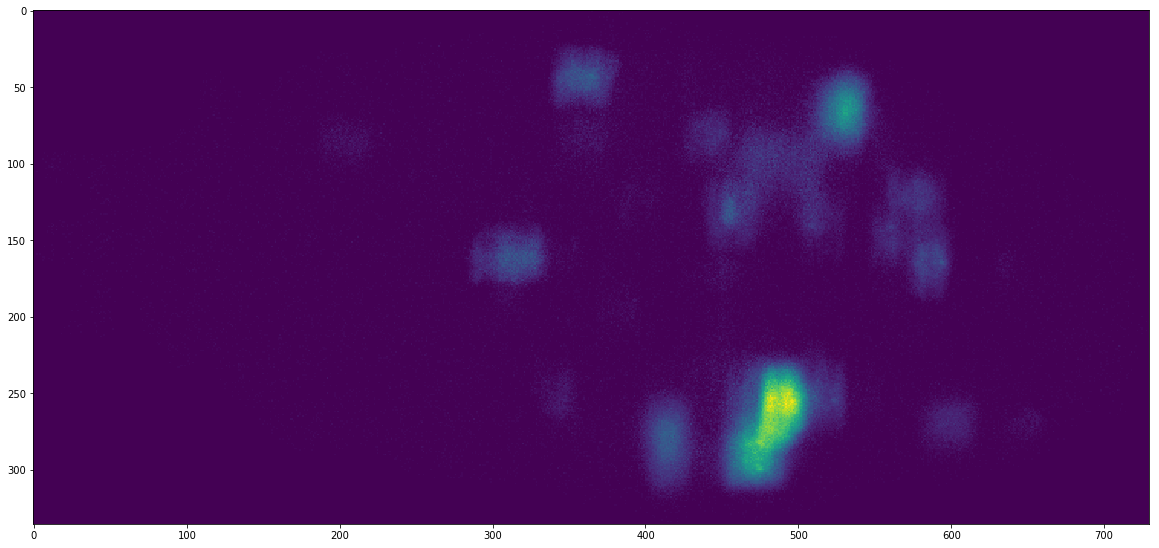

In [6]:
stack = lightroot.io.get_stack(71)
stack = lightroot.blobs.low_pass_2d_proj_root_segmentation(stack)
lightroot.io.plotimg(stack)

### 3d

In [7]:
# stack= lightroot.blobs.low_pass_root_segmentation(stack)
# lightroot.io.plotimg(stack_sample)

## sharpening root region

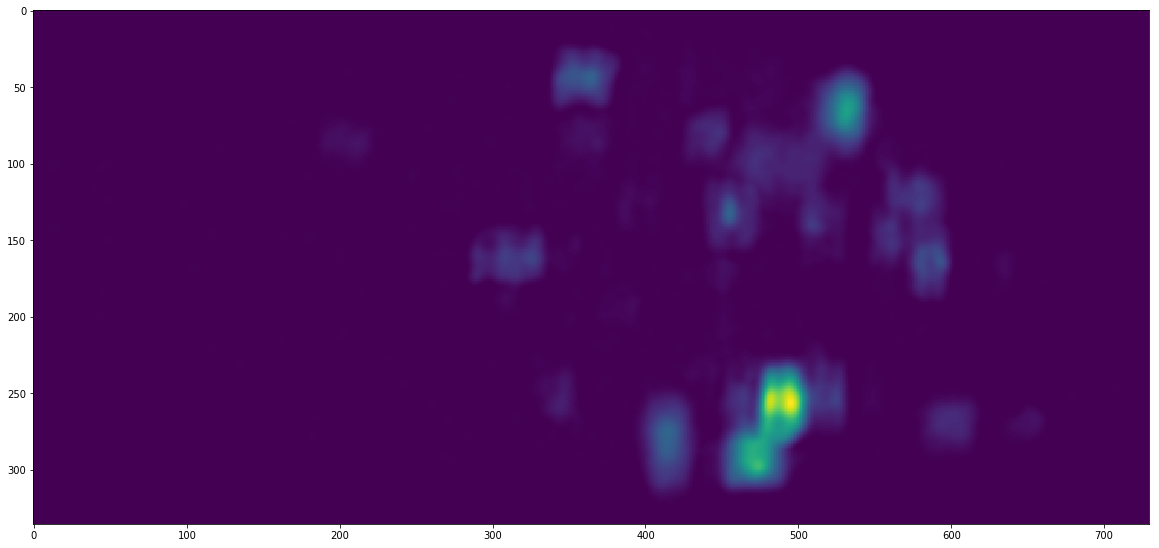

In [8]:
stack = lightroot.blobs.sharpen(stack, iterations=1)
lightroot.io.plotimg(stack)

## isolating blobs in data

10/04/2018 12:43:34 INFO(71):sharpening done. percentage non-zero is 19.95%


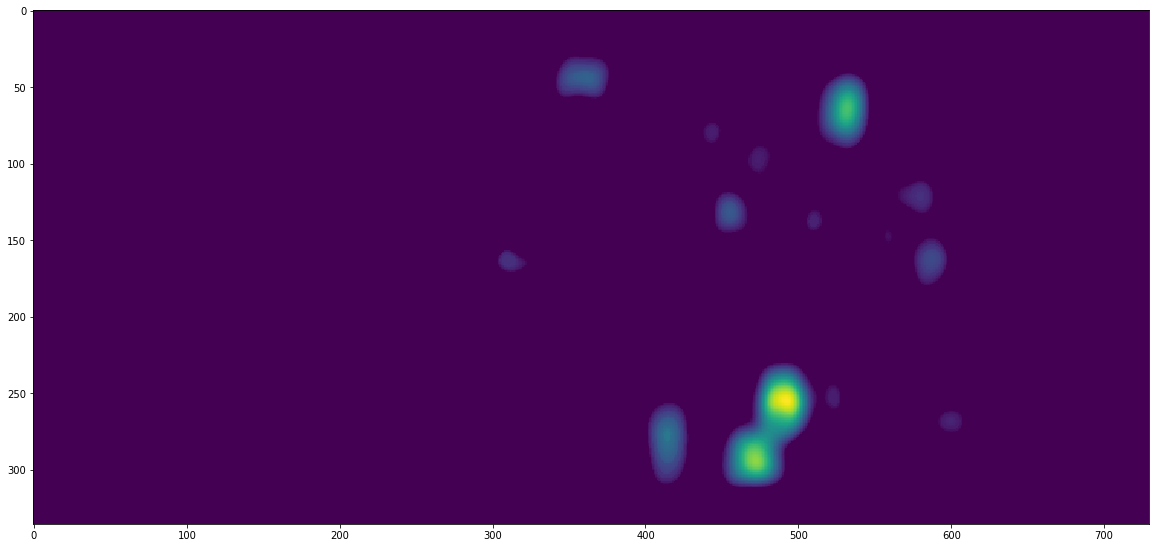

In [9]:
stack = lightroot.blobs.isolate(stack)
ax = lightroot.io.plotimg(stack)

## marking centroids

10/04/2018 12:43:37 INFO(71):adding big region because no little region found - note the vol of this item is 20034 and its ecc is 0.866910168467422
10/04/2018 12:43:37 INFO(71):adding big region because no little region found - note the vol of this item is 1260 and its ecc is 0.633994608920925
10/04/2018 12:43:37 INFO(71):adding big region because no little region found - note the vol of this item is 1568 and its ecc is 0.500767285108415
10/04/2018 12:43:37 INFO(71):Found 10 centroids


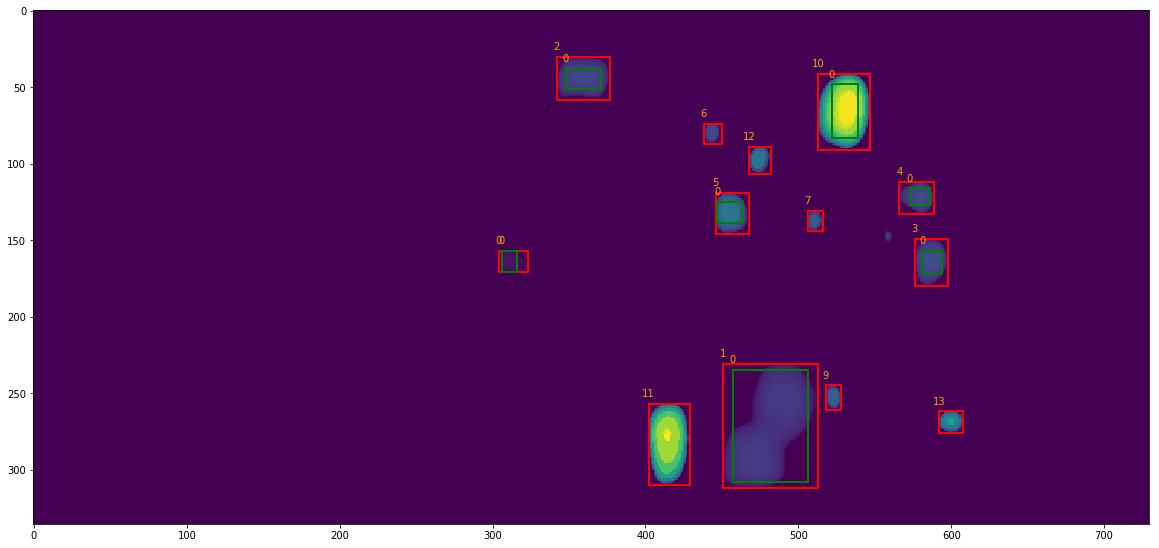

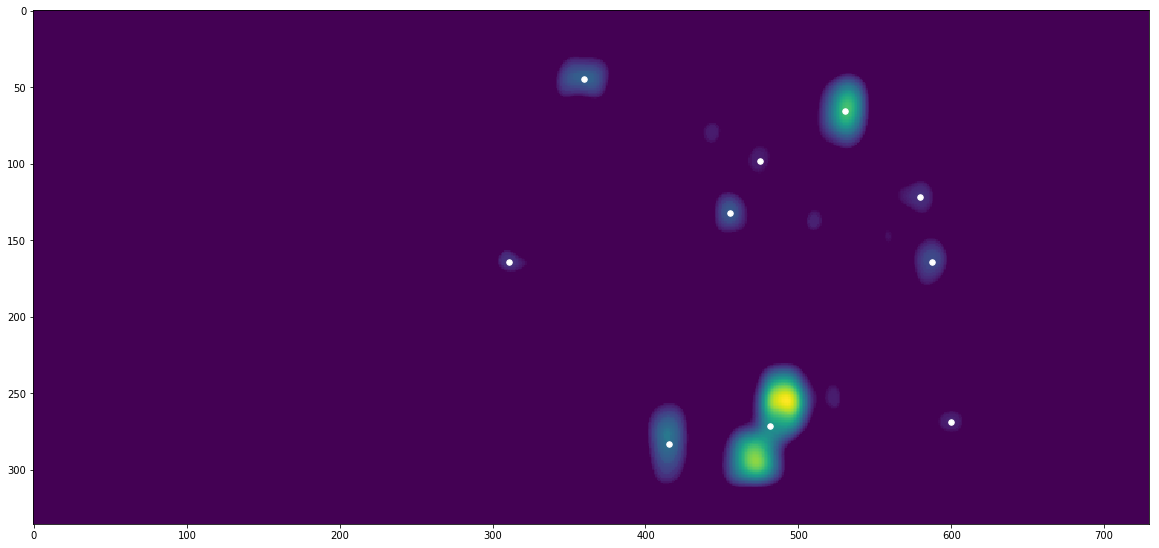

In [10]:
blobs_centroids = lightroot.blobs.blob_centroids(stack, display=True, max_final_ecc=0.95,min_final_volume=1000, underlying_image=stack)
lightroot.io.overlay_blobs(stack,blobs_centroids)

In [11]:
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm